### Insurance Claims prediction :

1. In the insurance industry, accurately predicting the likelihood of claims is essential for risk assessment and policy pricing.
2.  However, insurance claims datasets frequently suffer from class imbalance, where the number of non-claims instances far exceeds that of actual claims.
3. This class imbalance poses challenges for predictive modeling, often leading to biased models favoring the majority class, resulting in subpar performance for the minority class, which is typically of greater interest.

### Key Features :

1. Policyholder Information: This includes demographic details such as age, gender, occupation, marital status, and geographical location.

2. laim History: Information regarding past insurance claims, including claim amounts, types of claims (e.g., medical, automobile), frequency of claims, and claim durations.

3. Policy Details: Details about the insurance policies held by the policyholders, such as coverage type, policy duration, premium amount, and deductibles.

4. Risk Factors: Variables indicating potential risk factors associated with policyholders, such as credit score, driving record (for automobile insurance), health status (for medical insurance), and property characteristics (for home insurance).

5. External Factors: Factors external to the policyholders that may influence claim likelihood, such as economic indicators, weather conditions, and regulatory changes.

### Dataset Overview:

1. The dataset utilized in this project comprises historical data on insurance claims, encompassing a variety of information about the policyholders, their demographics, past claim history, and other pertinent features.
2. The dataset is structured to facilitate predictive modeling tasks aimed at accurately identifying the likelihood of future insurance claims.

### Application areas :

1. Risk Assessment: Assessing the risk associated with insuring a particular policyholder based on their characteristics and historical claim behavior.

2. Policy Pricing: Determining appropriate premium amounts for insurance policies by estimating the expected claim frequency and severity.

3. Fraud Detection: Identifying fraudulent insurance claims by detecting anomalous patterns in claim submissions and policyholder behavior.

4. Customer Segmentation: Segmenting policyholders into distinct groups based on their risk profiles and insurance needs to tailor marketing strategies and policy offerings.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
# read the dataset

df = pd.read_csv("insurance_claims")

df.head()

,policy_id,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
0,POL045360,9.3,1.2,41,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
1,POL016745,8.2,1.8,35,C2,27003,C1,M9,Diesel,200Nm@1750rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
2,POL007194,9.5,0.2,44,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
3,POL018146,5.2,0.4,44,C10,73430,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
4,POL049011,10.1,1.0,56,C13,5410,B2,M5,Diesel,200Nm@3000rpm,...,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0


In [5]:
print("Number of rows and columns are : ", df.shape)

Number of rows and columns are :  (58592, 41)


In [6]:
print("Columns in the dataset are:\n ")

df.columns

# in order to understand what each column means
# we can refer column_understanding.txt

Columns in the dataset are:
 


Index(['policy_id', 'subscription_length', 'vehicle_age', 'customer_age',
       'region_code', 'region_density', 'segment', 'model', 'fuel_type',
       'max_torque', 'max_power', 'engine_type', 'airbags', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'steering_type', 'turning_radius', 'length',
       'width', 'gross_weight', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'claim_status'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   subscription_length               58592 non-null  float64
 2   vehicle_age                       58592 non-null  float64
 3   customer_age                      58592 non-null  int64  
 4   region_code                       58592 non-null  object 
 5   region_density                    58592 non-null  int64  
 6   segment                           58592 non-null  object 
 7   model                             58592 non-null  object 
 8   fuel_type                         58592 non-null  object 
 9   max_torque                        58592 non-null  object 
 10  max_power                         58592 non-null  object 
 11  engine_type                       58592 non-null  object 
 12  airb

In [8]:
# check for missing values in terms of percentage

perc_miss_Data = df.isnull().sum()/len(df)*100
perc_miss_Data

# no need for imputation as there are no missing values]

# imputation is a technique to fill in the missing values
# usually we prefer filling the missing values with the median
# mean are sensitive to outliers and hence not preferred.
# sometimes, imputing with 0 is also considered as per the requirement.

,0
policy_id,0.0
subscription_length,0.0
vehicle_age,0.0
customer_age,0.0
region_code,0.0
region_density,0.0
segment,0.0
model,0.0
fuel_type,0.0
max_torque,0.0


In [9]:
# check for duplicate rows

df.duplicated().sum()

# there are no duplicate rows
# usually we drop the duplicate rows to avoid repetition

# in order to drop duplicate data
# df = df.drop_duplicates()

# what if i want to specifically drop in a certain column
# df = df.drop_duplicates(subset=['policy_id'])

0

In [10]:
# dropping policy_id column as it is irrelevant

df = df.drop('policy_id', axis=1)

In [11]:
df.columns

Index(['subscription_length', 'vehicle_age', 'customer_age', 'region_code',
       'region_density', 'segment', 'model', 'fuel_type', 'max_torque',
       'max_power', 'engine_type', 'airbags', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'steering_type', 'turning_radius', 'length',
       'width', 'gross_weight', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'claim_status'],
      dtype='object')

### Exploratory Data Analysis begins

### Customer Age distribution

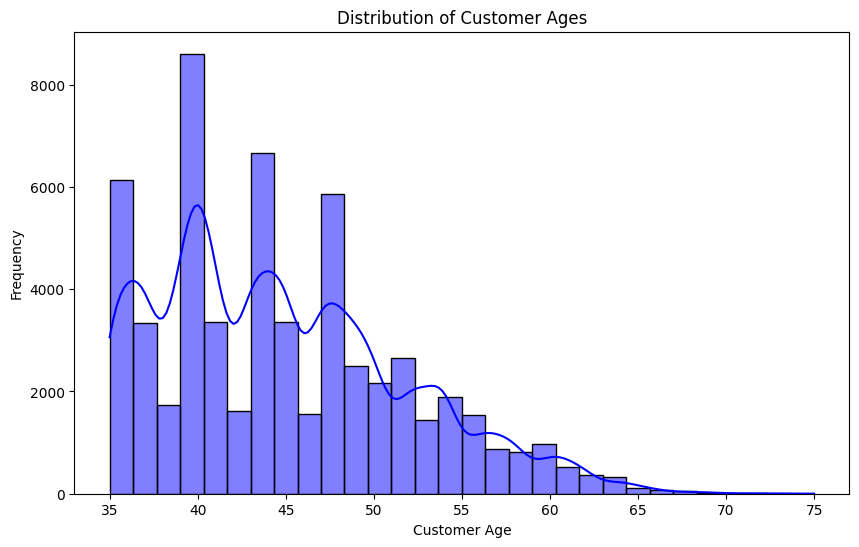

In [13]:
# Assuming your DataFrame is named `data`
plt.figure(figsize=(10, 6))
sns.histplot(df['customer_age'], bins=30, kde=True, color='blue')
plt.title('Distribution of Customer Ages')
plt.xlabel('Customer Age')
plt.ylabel('Frequency')
plt.show()

### Observations :

Right-Skewed Distribution: The age distribution is heavily right-skewed. This indicates that the majority of customers are younger, with a smaller number of older customers. The peak frequency is between 38-40 years old.

Mode Around 40: The mode (most frequent age) appears to be around 40 years old. This is where the highest bar in the histogram is located.

Rapid Decline After 45: The frequency of customers drops significantly after the age of 45, demonstrating a much lower representation of older demographics in the customer base.

Long Tail of Older Customers: Despite the drop after 45, there's a long tail stretching towards the higher ages, indicating a small but persistent presence of customers in their 60s and 70s.

### Claims Status Analysis

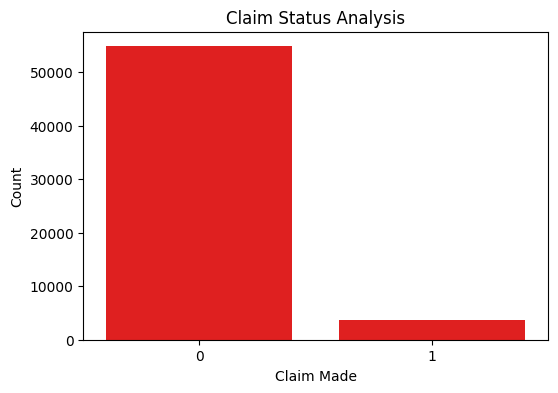

In [16]:
plt.figure(figsize=(6, 4))
sns.countplot(x='claim_status', data=df,color='red')
plt.title('Claim Status Analysis')
plt.xlabel('Claim Made')
plt.ylabel('Count')
plt.show()

### Observations :

Significant Class Imbalance: The chart reveals a substantial class imbalance between the two claim statuses. The vast majority of instances belong to class 0 ("No Claim Made"), while class 1 ("Claim Made") represents a very small fraction.

Few Claims Made: This suggests that claims are relatively infrequent events within the dataset. The exact proportion should be calculated, but visually, it's clear claims (1) are much less common than non-claims (0).

Potential Modeling Challenges: The class imbalance presents a potential challenge for predictive modeling. Models trained on this data may be biased towards predicting the majority class (0) and have poor performance on the minority class (1), which is often the class of interest.

Need for Mitigation Strategies: If this data is used for modeling, strategies to address the class imbalance should be considered. These might include oversampling the minority class, undersampling the majority class, or using cost-sensitive learning algorithms.

### Vehicle Age and Claims

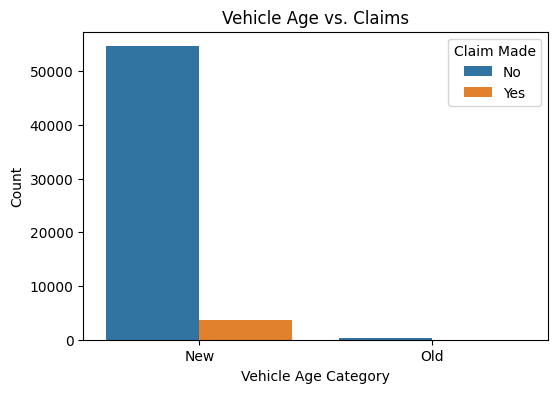

In [20]:
# Categorizing vehicle age into 'new' and 'old' for simplification
df['vehicle_age_category'] = pd.cut(df['vehicle_age'], bins=[0, 5, 100],
                                    labels=['New', 'Old'], right=False)

plt.figure(figsize=(6, 4))
sns.countplot(x='vehicle_age_category', hue='claim_status', data=df)
plt.title('Vehicle Age vs. Claims')
plt.xlabel('Vehicle Age Category')
plt.ylabel('Count')
plt.legend(title='Claim Made', labels=['No', 'Yes'])
plt.show()

### Observations

More New Vehicles: There's a significantly larger number of "New" vehicles in the dataset compared to "Old" vehicles. This could imply a bias in the data collection or simply reflect the market distribution of vehicle ages.

More Claims for New Vehicles (Proportionally): While fewer claims are made overall (consistent with the previous claim analysis), a larger proportion of claims come from "New" vehicles compared to "Old". Given the much higher number of new vehicles, this might not be surprising, but it's still noteworthy. Calculating the claim rate (claims/total vehicles) for each category would help confirm this.

Very Few Claims on Old Vehicles: The number of claims made for "Old" vehicles is exceptionally low. This could be due to various factors, including fewer old vehicles being insured, different usage patterns, or better maintenance of older vehicles by their owners.

Potential for Further Investigation: The data suggests there might be a relationship between vehicle age and claim frequency. Further investigation is warranted to understand the underlying causes. This could involve analyzing the types of claims made for each age group, considering other factors like mileage, vehicle type, and driver demographics.

### Checking for correlation

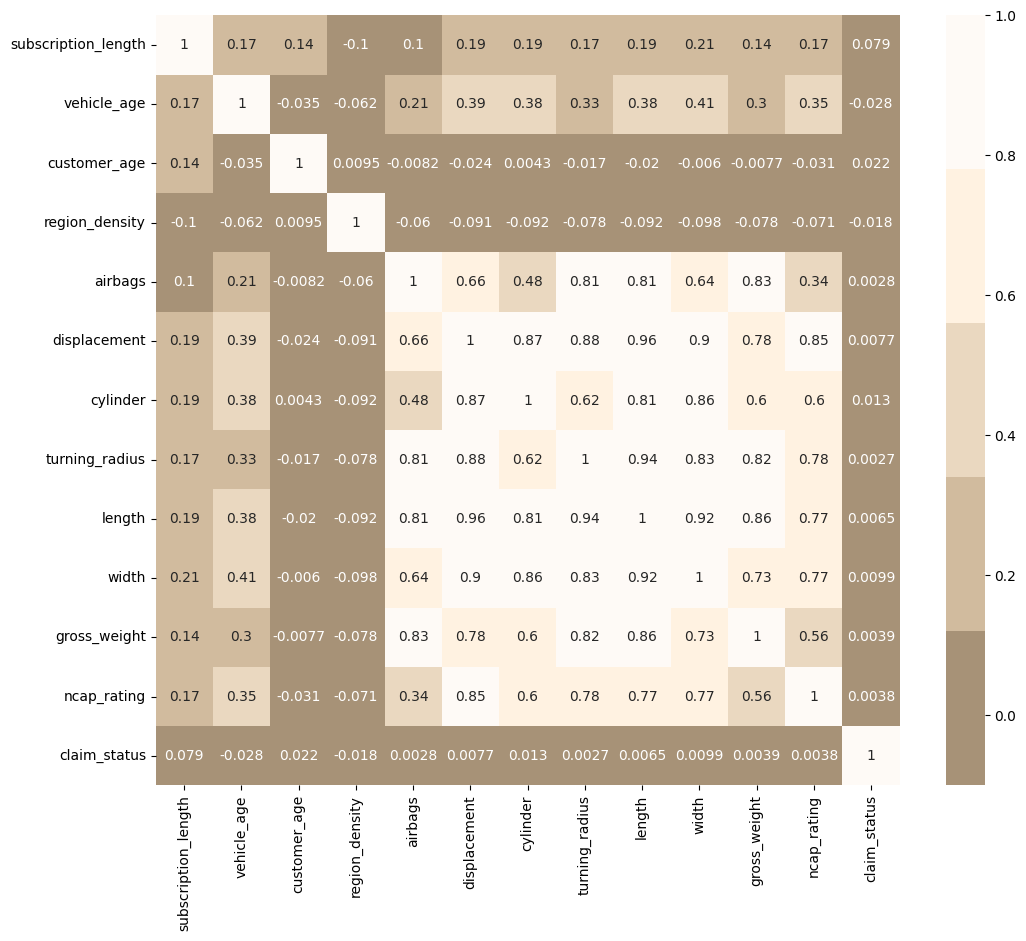

In [21]:
# Creating a heatmap to visualize the correlation matrix of numerical columns
plt.figure(figsize=(12, 10))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap=['#A79277', '#D1BB9E', '#EAD8C0', '#FFF2E1', '#FEFAF6'])
plt.show()

### Vehicle Age vs. Claim Status

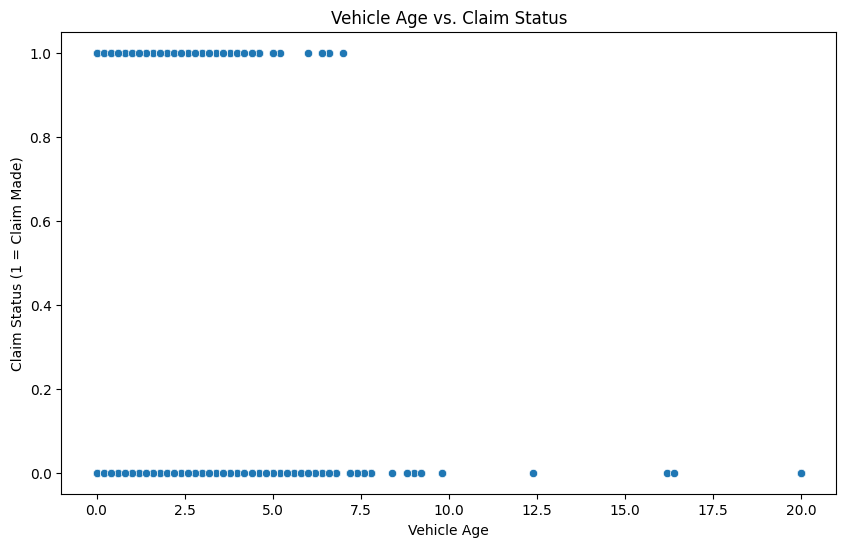

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='vehicle_age', y='claim_status', data=df)
plt.title('Vehicle Age vs. Claim Status')
plt.xlabel('Vehicle Age')
plt.ylabel('Claim Status (1 = Claim Made)')
plt.show()

### Observations

Claims Concentrated at Lower Vehicle Ages: The plot clearly shows a strong concentration of claims (Claim Status = 1) for vehicles between the ages of approximately 0 and 7 years. Almost all claims occur within this range.

Most Vehicles Don't Have Claims: The overwhelming majority of data points are clustered at Claim Status = 0, regardless of vehicle age. This reinforces the previous observation of a significant class imbalance where claims are relatively rare events.


### Claims by Vehicle Model

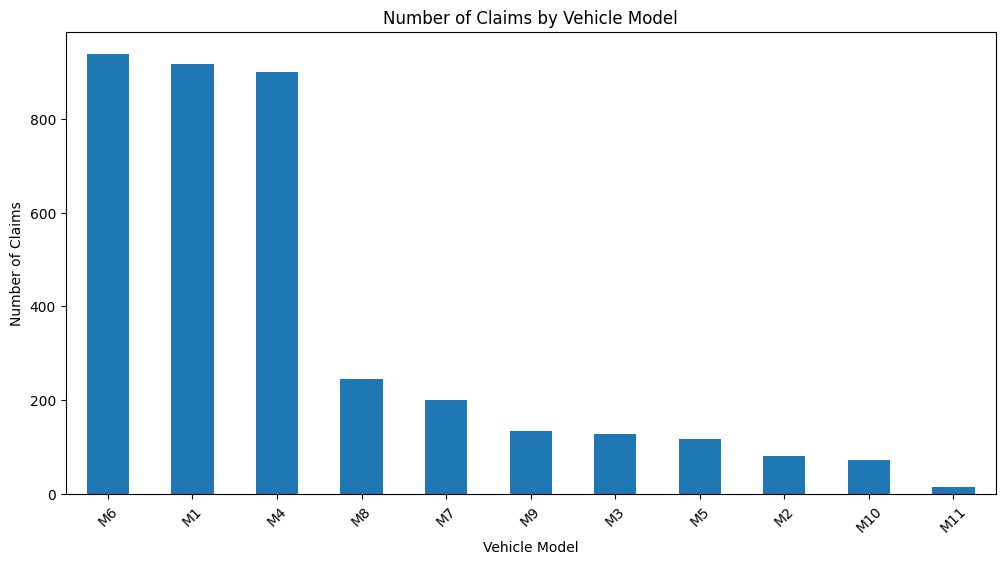

In [28]:
# Count of claims by vehicle model
model_claims = df[df['claim_status'] == 1].groupby('model').size().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
model_claims.plot(kind='bar')
plt.title('Number of Claims by Vehicle Model')
plt.xlabel('Vehicle Model')
plt.ylabel('Number of Claims')
plt.xticks(rotation=45)
plt.show()

### Effect of Safety Features on Claims

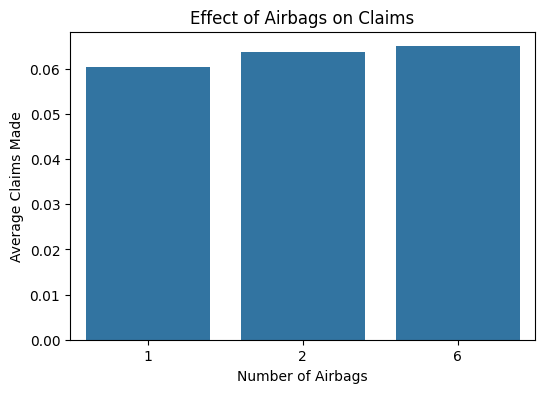

In [30]:
# Group by airbags presence and calculate the average claim made
airbag_claims = df.groupby('airbags')['claim_status'].mean().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(x='airbags', y='claim_status', data=airbag_claims)
plt.title('Effect of Airbags on Claims')
plt.xlabel('Number of Airbags')
plt.ylabel('Average Claims Made')
plt.show()

### Observations

Slightly Higher Claim Rate with More Airbags: The chart indicates that vehicles with more airbags (2 and 6) have a slightly higher average claim rate compared to vehicles with only one airbag. This is counterintuitive to the general expectation that more safety features would lead to fewer claims.

Minimal Difference Between 2 and 6 Airbags: There's a negligible difference in average claim rates between vehicles with 2 and 6 airbags. This might suggest that having more than two airbags doesn't significantly alter the likelihood of a claim.

Potential Confounding Factors: The observed relationship could be due to confounding factors. For example, vehicles with more airbags might be more expensive or larger, leading to higher repair costs and thus a greater likelihood of claims being filed even for minor incidents. The type of vehicle and driver behavior could also play a role.

### Distribution of Vehicle Types by Region

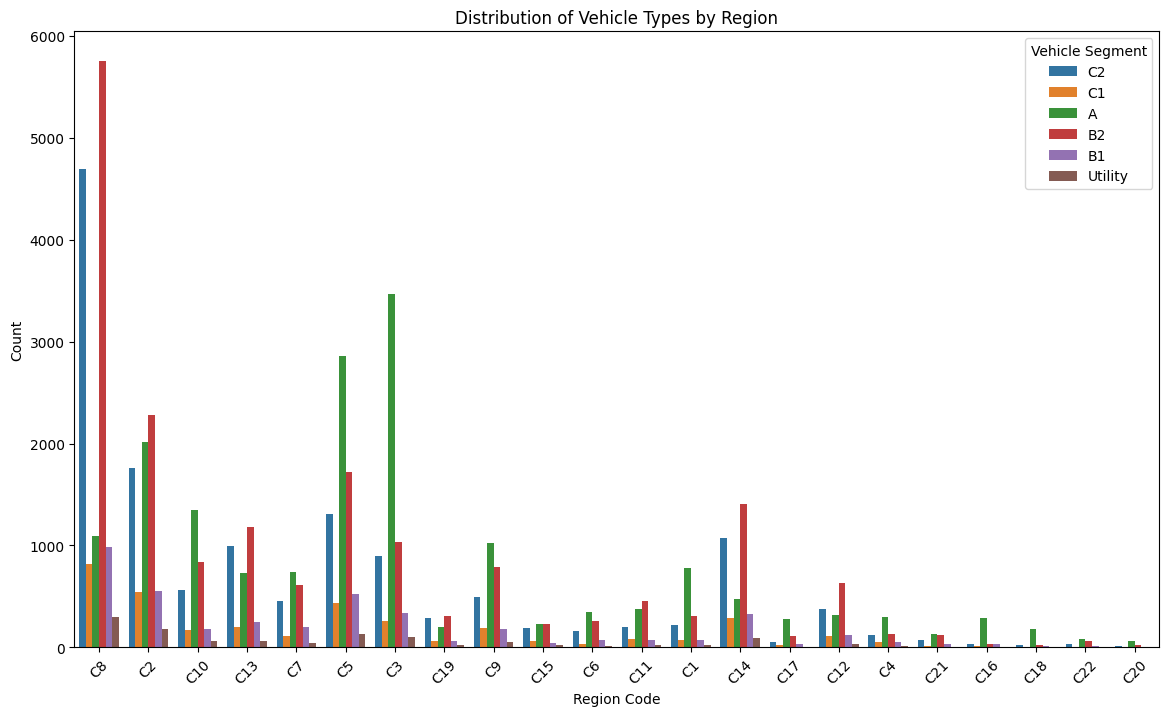

In [31]:
plt.figure(figsize=(14, 8))
sns.countplot(x='region_code', hue='segment', data=df)
plt.title('Distribution of Vehicle Types by Region')
plt.xlabel('Region Code')
plt.ylabel('Count')
plt.legend(title='Vehicle Segment')
plt.xticks(rotation=45)
plt.show()

### Claims Status by Engine Type

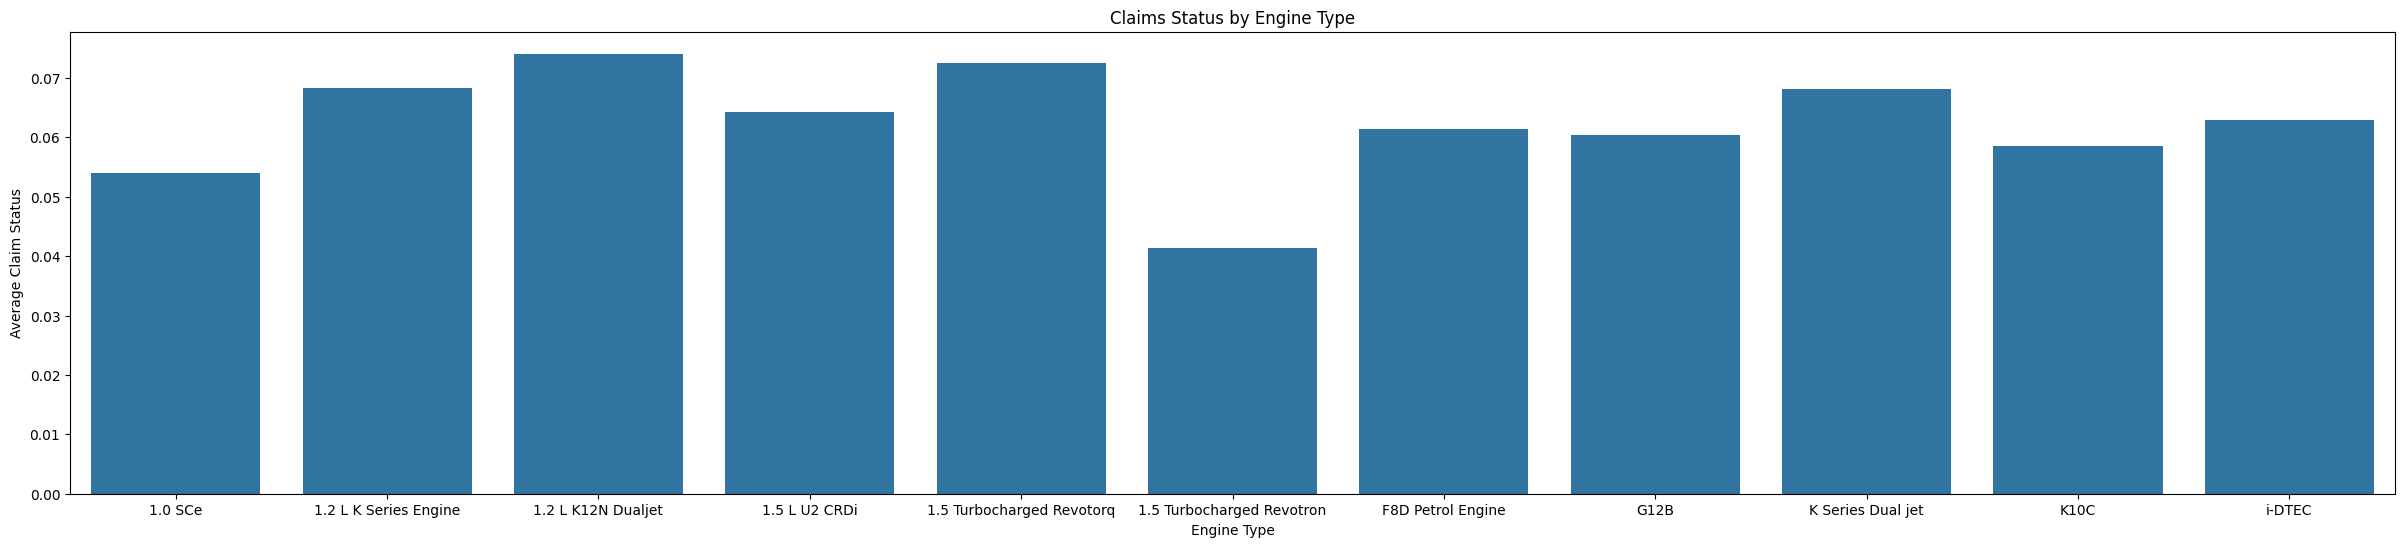

In [37]:
engine_claims = df.groupby('engine_type')['claim_status'].mean().reset_index()

plt.figure(figsize=(30, 6))
sns.barplot(x='engine_type', y='claim_status', data=engine_claims)
plt.title('Claims Status by Engine Type')
plt.xlabel('Engine Type')
plt.ylabel('Average Claim Status')
plt.show()

### Observations

Variation in Claim Rates Across Engine Types: The chart clearly demonstrates variation in average claim status (which likely represents the claim rate) across different engine types. Some engine types have noticeably higher average claim statuses than others.

Highest Claim Rates: The "1.5 Turbocharged Revotron," "1.2 L K12N Dualjet," and "K Series Dual jet" engine types appear to have the highest average claim statuses, suggesting they might be associated with a greater likelihood of claims.

Lowest Claim Rate: The "1.5 Turbocharged Revotron" engine type stands out with the lowest average claim status, indicating a potentially lower propensity for claims compared to other engine types.

In [ ]:
# convert this notebook into html

